## Individual Dataset

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Sales_January_2019.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9723 entries, 0 to 9722
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          9697 non-null   object
 1   Product           9697 non-null   object
 2   Quantity Ordered  9697 non-null   object
 3   Price Each        9697 non-null   object
 4   Order Date        9697 non-null   object
 5   Purchase Address  9697 non-null   object
dtypes: object(6)
memory usage: 455.9+ KB


In [4]:
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,9697,9697,9697,9697,9697,9697
unique,9269,20,8,19,8077,9161
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,16,1171,8795,1171,16,16


In [5]:
df['Quantity Ordered'].value_counts()

1                   8795
2                    670
3                    159
4                     38
Quantity Ordered      16
5                     13
7                      3
6                      3
Name: Quantity Ordered, dtype: int64

In [6]:
df.drop(df[df["Quantity Ordered"]=="Quantity Ordered"].index, inplace = True) 

In [7]:
df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
5,141239,AAA Batteries (4-pack),1,2.99,01/29/19 20:22,"775 Willow St, San Francisco, CA 94016"
6,141240,27in 4K Gaming Monitor,1,389.99,01/26/19 12:16,"979 Park St, Los Angeles, CA 90001"
7,141241,USB-C Charging Cable,1,11.95,01/05/19 12:04,"181 6th St, San Francisco, CA 94016"
8,141242,Bose SoundSport Headphones,1,99.99,01/01/19 10:30,"867 Willow St, Los Angeles, CA 90001"
9,141243,Apple Airpods Headphones,1,150,01/22/19 21:20,"657 Johnson St, San Francisco, CA 94016"


In [8]:
df['Quantity Ordered'].value_counts()

1    8795
2     670
3     159
4      38
5      13
7       3
6       3
Name: Quantity Ordered, dtype: int64

In [9]:
df.isna().sum()

Order ID            26
Product             26
Quantity Ordered    26
Price Each          26
Order Date          26
Purchase Address    26
dtype: int64

In [10]:
df.dropna(how="all",inplace=True)

In [11]:
df.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [12]:
df.shape

(9681, 6)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9681 entries, 0 to 9722
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          9681 non-null   object
 1   Product           9681 non-null   object
 2   Quantity Ordered  9681 non-null   object
 3   Price Each        9681 non-null   object
 4   Order Date        9681 non-null   object
 5   Purchase Address  9681 non-null   object
dtypes: object(6)
memory usage: 529.4+ KB


In [14]:
df["Month"] = "January"

In [15]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",January
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",January
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",January
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",January
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",January


In [16]:
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month'],
      dtype='object')

## Multiple Dataset

In [17]:
sales_data = pd.DataFrame(columns = df.columns)

In [18]:
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month


In [19]:
months = ["January","February","March","April","May","June","July","August","September","October","November","December"]
#months = ["January","February"]

In [20]:
#Looping over Datasets

for month in months:
    df2 = pd.read_csv("Sales_{}_2019.csv".format(month))
    df2.drop(df2[df2["Quantity Ordered"]=="Quantity Ordered"].index, inplace = True)
    df2.dropna(how="any",inplace=True)
    sales_data = sales_data.append(df2)
    

In [21]:
#Type Conversion

sales_data["Order Date"] = pd.to_datetime(sales_data["Order Date"])
sales_data["Price Each"] = sales_data["Price Each"].astype("float")
sales_data["Quantity Ordered"] = sales_data["Quantity Ordered"].astype("int")

In [22]:
#Defining Additional Features and Target Variable 

sales_data["Month"] = sales_data["Order Date"].dt.month
sales_data["Year"] = sales_data["Order Date"].dt.year
sales_data["Total Sales"] = sales_data["Quantity Ordered"] * sales_data["Price Each"] 
sales_data["City"] = sales_data["Purchase Address"].str.split(",").str[1]

In [23]:
sales_data["Month"] = sales_data["Month"].astype("category")
sales_data["Product"] = sales_data["Product"].astype("category")
sales_data["City"] = sales_data["City"].astype("category")
sales_data["Year"] = sales_data["Year"].astype("category")

In [24]:
sales_data.shape

(185950, 10)

In [25]:
sales_data["Month"].nunique()

12

In [26]:
sales_data.head(16)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year,Total Sales,City
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,2019,700.00,Boston
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,2019,14.95,Portland
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,2019,23.98,San Francisco
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,2019,149.99,Los Angeles
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,2019,11.99,Austin
5,141239,AAA Batteries (4-pack),1,2.99,2019-01-29 20:22:00,"775 Willow St, San Francisco, CA 94016",1,2019,2.99,San Francisco
6,141240,27in 4K Gaming Monitor,1,389.99,2019-01-26 12:16:00,"979 Park St, Los Angeles, CA 90001",1,2019,389.99,Los Angeles
7,141241,USB-C Charging Cable,1,11.95,2019-01-05 12:04:00,"181 6th St, San Francisco, CA 94016",1,2019,11.95,San Francisco
8,141242,Bose SoundSport Headphones,1,99.99,2019-01-01 10:30:00,"867 Willow St, Los Angeles, CA 90001",1,2019,99.99,Los Angeles
9,141243,Apple Airpods Headphones,1,150.00,2019-01-22 21:20:00,"657 Johnson St, San Francisco, CA 94016",1,2019,150.00,San Francisco


In [27]:
sales_data.describe()

,Quantity Ordered,Price Each,Total Sales
count,185950.000000,185950.000000,185950.000000
mean,1.124383,184.399735,185.490917
std,0.442793,332.731330,332.919771
min,1.000000,2.990000,2.990000
25%,1.000000,11.950000,11.950000
50%,1.000000,14.950000,14.950000
75%,1.000000,150.000000,150.000000
max,9.000000,1700.000000,3400.000000


In [28]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 25116
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  category      
 2   Quantity Ordered  185950 non-null  int32         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   Month             185950 non-null  category      
 7   Year              185950 non-null  category      
 8   Total Sales       185950 non-null  float64       
 9   City              185950 non-null  category      
dtypes: category(4), datetime64[ns](1), float64(2), int32(1), object(2)
memory usage: 9.9+ MB


In [29]:
sales_data["Quantity Ordered"].value_counts()

1    168552
2     13324
3      2920
4       806
5       236
6        80
7        24
8         5
9         3
Name: Quantity Ordered, dtype: int64

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme(style="ticks")

In [31]:
sales_data["Product"].nunique()

19

observation : There are total of 19 products.

<AxesSubplot:xlabel='Quantity Ordered', ylabel='Price Each'>

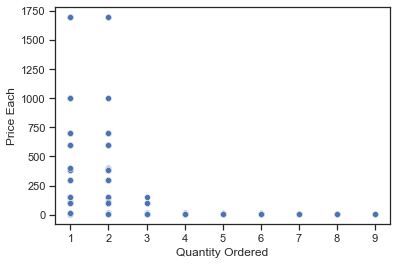

In [32]:
sns.scatterplot(x="Quantity Ordered",y="Price Each",data=sales_data)

Observation : Products with high price had less quantity ordered and vice versa.

In [33]:
sales_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year,Total Sales,City
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,2019,700.00,Boston
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,2019,14.95,Portland
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,2019,23.98,San Francisco
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,2019,149.99,Los Angeles
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,2019,11.99,Austin
5,141239,AAA Batteries (4-pack),1,2.99,2019-01-29 20:22:00,"775 Willow St, San Francisco, CA 94016",1,2019,2.99,San Francisco
6,141240,27in 4K Gaming Monitor,1,389.99,2019-01-26 12:16:00,"979 Park St, Los Angeles, CA 90001",1,2019,389.99,Los Angeles
7,141241,USB-C Charging Cable,1,11.95,2019-01-05 12:04:00,"181 6th St, San Francisco, CA 94016",1,2019,11.95,San Francisco
8,141242,Bose SoundSport Headphones,1,99.99,2019-01-01 10:30:00,"867 Willow St, Los Angeles, CA 90001",1,2019,99.99,Los Angeles
9,141243,Apple Airpods Headphones,1,150.00,2019-01-22 21:20:00,"657 Johnson St, San Francisco, CA 94016",1,2019,150.00,San Francisco


In [34]:
#sns.violinplot(x="City", y=sales_data["Total Sales"].sum(), data=sales_data)

In [35]:
product_groupby = sales_data.groupby(by="Product")

In [36]:
sales_data.shape

(185950, 10)

In [37]:
product_groupby.describe()["Quantity Ordered"]

,count,mean,std,min,25%,50%,75%,max
Product,,,,,,,,
20in Monitor,4101.0,1.006828,0.082357,1.0,1.0,1.0,1.0,2.0
27in 4K Gaming Monitor,6230.0,1.002247,0.047355,1.0,1.0,1.0,1.0,2.0
27in FHD Monitor,7507.0,1.005728,0.075471,1.0,1.0,1.0,1.0,2.0
34in Ultrawide Monitor,6181.0,1.002912,0.053890,1.0,1.0,1.0,1.0,2.0
AA Batteries (4-pack),20577.0,1.343004,0.676300,1.0,1.0,1.0,2.0,7.0
AAA Batteries (4-pack),20641.0,1.502689,0.869323,1.0,1.0,1.0,2.0,9.0
Apple Airpods Headphones,15549.0,1.007203,0.085324,1.0,1.0,1.0,1.0,3.0
Bose SoundSport Headphones,13325.0,1.009906,0.100544,1.0,1.0,1.0,1.0,3.0
Flatscreen TV,4800.0,1.003958,0.062797,1.0,1.0,1.0,1.0,2.0


In [38]:
month_groupby = sales_data.groupby(by="Month")
month_groupby.describe()["Quantity Ordered"]

,count,mean,std,min,25%,50%,75%,max
Month,,,,,,,,
1,9709.0,1.122979,0.443230,1.0,1.0,1.0,1.0,7.0
2,11975.0,1.123090,0.431219,1.0,1.0,1.0,1.0,7.0
3,15153.0,1.122220,0.441215,1.0,1.0,1.0,1.0,7.0
4,18279.0,1.124679,0.436519,1.0,1.0,1.0,1.0,7.0
5,16566.0,1.126826,0.448126,1.0,1.0,1.0,1.0,7.0
6,13554.0,1.125350,0.429664,1.0,1.0,1.0,1.0,9.0
7,14293.0,1.124467,0.460865,1.0,1.0,1.0,1.0,9.0
8,11961.0,1.124321,0.449650,1.0,1.0,1.0,1.0,8.0
9,11621.0,1.128044,0.434869,1.0,1.0,1.0,1.0,6.0


In [39]:
month_and_product_groupby = sales_data.groupby(by=['Month','Product'])

In [40]:
groups_stats = month_and_product_groupby.describe()['Quantity Ordered']

In [41]:
groups_stats.loc[[1,2]]

count      mean       std  min  25%  50%  \
Month Product                                                                 
1     20in Monitor                 215.0  1.013953  0.117572  1.0  1.0  1.0   
      27in 4K Gaming Monitor       313.0  1.000000  0.000000  1.0  1.0  1.0   
      27in FHD Monitor             421.0  1.002375  0.048737  1.0  1.0  1.0   
      34in Ultrawide Monitor       313.0  1.003195  0.056523  1.0  1.0  1.0   
      AA Batteries (4-pack)       1038.0  1.371869  0.700226  1.0  1.0  1.0   
      AAA Batteries (4-pack)      1084.0  1.476015  0.861818  1.0  1.0  1.0   
      Apple Airpods Headphones     813.0  1.006150  0.078229  1.0  1.0  1.0   
      Bose SoundSport Headphones   659.0  1.004552  0.067369  1.0  1.0  1.0   
      Flatscreen TV                244.0  1.000000  0.000000  1.0  1.0  1.0   
      Google Phone                 318.0  1.003145  0.056077  1.0  1.0  1.0   
      LG Dryer                      39.0  1.000000  0.000000  1.0  1.0  1.0   
      LG Washing Machine            42.0  1.000000  0.000000  1.0  1.0  1.0   
      Lightning Charging Cable    1071.0  1.078431  0.295467  1.0  1.0  1.0   
      Macbook Pro Laptop           235.0  1.000000  0.000000  1.0  1.0  1.0   
      ThinkPad Laptop              218.0  1.004587  0.067729  1.0  1.0  1.0   
      USB-C Charging Cable        1174.0  1.096252  0.333065  1.0  1.0  1.0   
      Vareebadd Phone              125.0  1.008000  0.089443  1.0  1.0  1.0   
      Wired Headphones            1006.0  1.078529  0.297245  1.0  1.0  1.0   
      iPhone                       381.0  1.000000  0.000000  1.0  1.0  1.0   
2     20in Monitor                 245.0  1.004082  0.063888  1.0  1.0  1.0   
      27in 4K Gaming Monitor       425.0  1.004706  0.068518  1.0  1.0  1.0   
      27in FHD Monitor             471.0  1.008493  0.091861  1.0  1.0  1.0   
      34in Ultrawide Monitor       416.0  1.004808  0.069254  1.0  1.0  1.0   
      AA Batteries (4-pack)       1276.0  1.359718  0.682492  1.0  1.0  1.0   
      AAA Batteries (4-pack)      1321.0  1.492808  0.829468  1.0  1.0  1.0   
      Apple Airpods Headphones    1010.0  1.001980  0.044477  1.0  1.0  1.0   
      Bose SoundSport Headphones   831.0  1.012034  0.109102  1.0  1.0  1.0   
      Flatscreen TV                312.0  1.003205  0.056614  1.0  1.0  1.0   
      Google Phone                 379.0  1.005277  0.072547  1.0  1.0  1.0   
      LG Dryer                      38.0  1.000000  0.000000  1.0  1.0  1.0   
      LG Washing Machine            40.0  1.000000  0.000000  1.0  1.0  1.0   
      Lightning Charging Cable    1395.0  1.074552  0.293701  1.0  1.0  1.0   
      Macbook Pro Laptop           276.0  1.000000  0.000000  1.0  1.0  1.0   
      ThinkPad Laptop              275.0  1.000000  0.000000  1.0  1.0  1.0   
      USB-C Charging Cable        1514.0  1.092470  0.315971  1.0  1.0  1.0   
      Vareebadd Phone              129.0  1.000000  0.000000  1.0  1.0  1.0   
      Wired Headphones            1183.0  1.081150  0.285299  1.0  1.0  1.0   
      iPhone                       439.0  1.000000  0.000000  1.0  1.0  1.0   

                                  75%  max  
Month Product                               
1     20in Monitor                1.0  2.0  
      27in 4K Gaming Monitor      1.0  1.0  
      27in FHD Monitor            1.0  2.0  
      34in Ultrawide Monitor      1.0  2.0  
      AA Batteries (4-pack)       2.0  5.0  
      AAA Batteries (4-pack)      2.0  7.0  
      Apple Airpods Headphones    1.0  2.0  
      Bose SoundSport Headphones  1.0  2.0  
      Flatscreen TV               1.0  1.0  
      Google Phone                1.0  2.0  
      LG Dryer                    1.0  1.0  
      LG Washing Machine          1.0  1.0  
      Lightning Charging Cable    1.0  3.0  
      Macbook Pro Laptop          1.0  1.0  
      ThinkPad Laptop             1.0  2.0  
      USB-C Charging Cable        1.0  4.0  
      Vareebadd Phone             1.0  2.0  
      Wired Headpho

In [42]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 25116
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  category      
 2   Quantity Ordered  185950 non-null  int32         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   Month             185950 non-null  category      
 7   Year              185950 non-null  category      
 8   Total Sales       185950 non-null  float64       
 9   City              185950 non-null  category      
dtypes: category(4), datetime64[ns](1), float64(2), int32(1), object(2)
memory usage: 9.9+ MB


<AxesSubplot:xlabel='Month'>

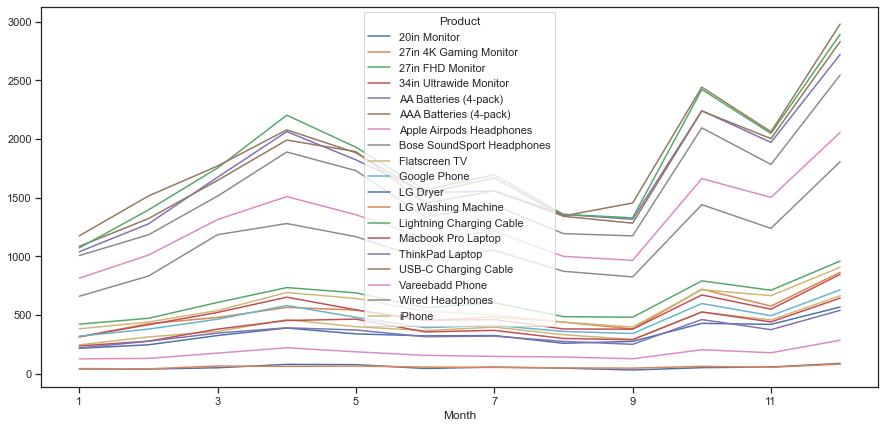

In [43]:
fig, ax = plt.subplots(figsize=(15,7))
#sales_data.groupby(['Month','Product']).count()['Quantity Ordered'].unstack().plot(ax=ax)l
sales_data.groupby(['Month',"Product"]).count()["Quantity Ordered"].unstack().plot(ax=ax)

In [44]:
sales_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year,Total Sales,City
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,2019,700.00,Boston
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,2019,14.95,Portland
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,2019,23.98,San Francisco
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,2019,149.99,Los Angeles
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,2019,11.99,Austin
5,141239,AAA Batteries (4-pack),1,2.99,2019-01-29 20:22:00,"775 Willow St, San Francisco, CA 94016",1,2019,2.99,San Francisco
6,141240,27in 4K Gaming Monitor,1,389.99,2019-01-26 12:16:00,"979 Park St, Los Angeles, CA 90001",1,2019,389.99,Los Angeles
7,141241,USB-C Charging Cable,1,11.95,2019-01-05 12:04:00,"181 6th St, San Francisco, CA 94016",1,2019,11.95,San Francisco
8,141242,Bose SoundSport Headphones,1,99.99,2019-01-01 10:30:00,"867 Willow St, Los Angeles, CA 90001",1,2019,99.99,Los Angeles
9,141243,Apple Airpods Headphones,1,150.00,2019-01-22 21:20:00,"657 Johnson St, San Francisco, CA 94016",1,2019,150.00,San Francisco


In [45]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 25116
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  category      
 2   Quantity Ordered  185950 non-null  int32         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   Month             185950 non-null  category      
 7   Year              185950 non-null  category      
 8   Total Sales       185950 non-null  float64       
 9   City              185950 non-null  category      
dtypes: category(4), datetime64[ns](1), float64(2), int32(1), object(2)
memory usage: 9.9+ MB


In [46]:
sales_data.drop(["Order ID","Purchase Address","Order Date"],axis=1,inplace=True)

In [47]:
sales_data.head()

,Product,Quantity Ordered,Price Each,Month,Year,Total Sales,City
0,iPhone,1,700.00,1,2019,700.00,Boston
1,Lightning Charging Cable,1,14.95,1,2019,14.95,Portland
2,Wired Headphones,2,11.99,1,2019,23.98,San Francisco
3,27in FHD Monitor,1,149.99,1,2019,149.99,Los Angeles
4,Wired Headphones,1,11.99,1,2019,11.99,Austin


In [48]:
sales_data_final = sales_data.reindex(columns=["Product","Quantity Ordered","Price Each","Month","Year","City","Total Sales"])

In [49]:
sales_data_final.head(15)

,Product,Quantity Ordered,Price Each,Month,Year,City,Total Sales
0,iPhone,1,700.00,1,2019,Boston,700.00
1,Lightning Charging Cable,1,14.95,1,2019,Portland,14.95
2,Wired Headphones,2,11.99,1,2019,San Francisco,23.98
3,27in FHD Monitor,1,149.99,1,2019,Los Angeles,149.99
4,Wired Headphones,1,11.99,1,2019,Austin,11.99
5,AAA Batteries (4-pack),1,2.99,1,2019,San Francisco,2.99
6,27in 4K Gaming Monitor,1,389.99,1,2019,Los Angeles,389.99
7,USB-C Charging Cable,1,11.95,1,2019,San Francisco,11.95
8,Bose SoundSport Headphones,1,99.99,1,2019,Los Angeles,99.99
9,Apple Airpods Headphones,1,150.00,1,2019,San Francisco,150.00


In [50]:
sales_data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 25116
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   Product           185950 non-null  category
 1   Quantity Ordered  185950 non-null  int32   
 2   Price Each        185950 non-null  float64 
 3   Month             185950 non-null  category
 4   Year              185950 non-null  category
 5   City              185950 non-null  category
 6   Total Sales       185950 non-null  float64 
dtypes: category(4), float64(2), int32(1)
memory usage: 5.7 MB


In [51]:
sales_data_final.columns

Index(['Product', 'Quantity Ordered', 'Price Each', 'Month', 'Year', 'City',
       'Total Sales'],
      dtype='object')

In [52]:
sales_data_final.iloc[450]

Product             USB-C Charging Cable
Quantity Ordered                       1
Price Each                         11.95
Month                                  1
Year                                2019
City                              Austin
Total Sales                        11.95
Name: 450, dtype: object

## Predictive Analysis

In [53]:
import catboost as cat
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [54]:
train, test = train_test_split(sales_data_final, test_size=0.2, random_state=42,shuffle=True)

In [55]:
cat_feat = ['Product','Month', 'City','Year']
features = list(set(train.columns)-set(['Total Sales']))
target = 'Total Sales'
model = cat.CatBoostRegressor(random_state=100,cat_features=cat_feat,verbose=0)
model.fit(train[features],train[target])

In [56]:
features

['Price Each', 'Quantity Ordered', 'Year', 'City', 'Month', 'Product']

In [57]:
y_true= pd.DataFrame(data=test[target], columns=['Total Sales'])
test_temp = test.drop(columns=[target])

In [58]:
y_pred = model.predict(test_temp[features])
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_true, y_pred))
print(rmse)

0.06440500007805644


In [59]:
r2_score(y_true,y_pred)

0.9999999626450695

### RMSE Score is 0.0644,Iterations-1000,Learning rate-0.03

In [60]:
#Training Error
model.get_best_score()

{'learn': {'RMSE': 0.0026743474660909346}}

In [61]:
model.tree_count_

1000

In [62]:
#model.get_evals_result()

In [63]:
arr = [[v1 for k1,v1 in v.items()] for k,v in model.evals_result_.items()]

<AxesSubplot:>

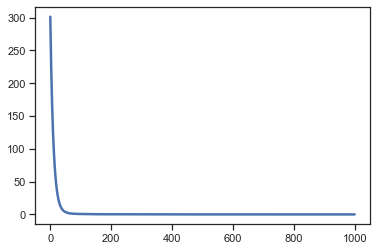

In [64]:
sns.lineplot(data=arr[0][0], palette="tab10", linewidth=2.5)

In [65]:
model.get_scale_and_bias()

(1.0, 185.46998596191406)

In [66]:
test_temp[features]

,Price Each,Quantity Ordered,Year,City,Month,Product
3991,99.99,1,2019,San Francisco,6,Bose SoundSport Headphones
8631,11.99,1,2019,Atlanta,3,Wired Headphones
1506,11.99,1,2019,Boston,7,Wired Headphones
6662,389.99,1,2019,New York City,12,27in 4K Gaming Monitor
4397,700.00,1,2019,San Francisco,4,iPhone
...,...,...,...,...,...,...
19233,150.00,1,2019,Atlanta,12,Apple Airpods Headphones
8741,150.00,1,2019,Los Angeles,7,Apple Airpods Headphones
13887,3.84,1,2019,Portland,5,AA Batteries (4-pack)
14025,999.99,1,2019,San Francisco,7,ThinkPad Laptop


In [67]:
y_value = model.predict(['2019',700.00,6,2,'Los Angeles','ThinkPad Laptop'])
print("The Price Predicted for the data is",y_value)

The Price Predicted for the data is 2876.1299447786087


In [68]:
#Specifying iterations and learning_rate manually

model1 = cat.CatBoostRegressor(random_state=100,cat_features=cat_feat,verbose=0,iterations=100,learning_rate=1)
model1.fit(train[features],train[target])

In [69]:
y_true= pd.DataFrame(data=test[target], columns=['Total Sales'])
test_temp = test.drop(columns=[target])

In [70]:
y_pred = model1.predict(test_temp[features])
rmse = sqrt(mean_squared_error(y_true, y_pred))
print(rmse)

0.0569661439033656


### RMSE Score is 0.056

In [71]:
#Training Error
model1.get_best_score()

{'learn': {'RMSE': 3.1604377808367976e-05}}

In [72]:
arr1 = [[v2 for k1,v2 in v.items()] for k,v in model1.evals_result_.items()]

<AxesSubplot:>

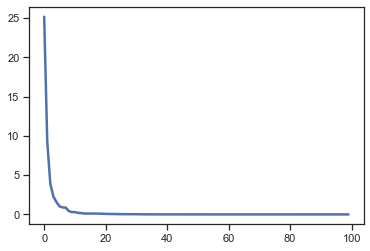

In [73]:
sns.lineplot(data=arr1[0][0], palette="tab10", linewidth=2.5)